In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.utils import image_dataset_from_directory

In [2]:
BATCH_SIZE = 100 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SHAPE = 150 # размерность к которой будет преведено входное изображение
EPOCHS = 120

train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test_dir'

total_train = 0
for animal in os.listdir(train_dir):
    total_train += len([name for name in os.listdir(train_dir + '/' + animal)])
print(total_train)

total_val = 0
for animal in os.listdir(validation_dir):
    total_val += len([name for name in os.listdir(validation_dir + '/' + animal)])
print(total_val)

21818
4361


In [3]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [4]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE))

Found 21818 images belonging to 10 classes.


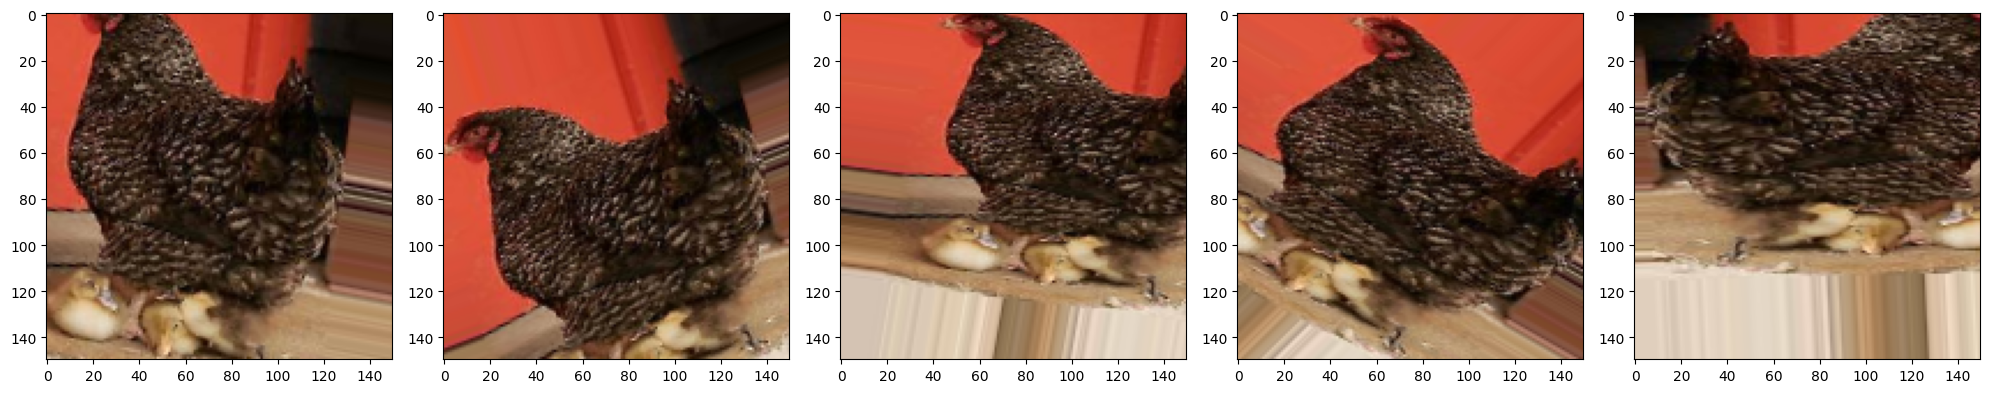

In [5]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [6]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE))

Found 4361 images belonging to 10 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

c:\Users\vedve\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen
)

Epoch 1/120


c:\Users\vedve\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 155s 693ms/step - accuracy: 0.2321 - loss: 2.1205 - val_accuracy: 0.3749 - val_loss: 1.7456
Epoch 2/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 137s 614ms/step - accuracy: 0.4139 - loss: 1.7108 - val_accuracy: 0.5111 - val_loss: 1.3818
Epoch 3/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 137s 614ms/step - accuracy: 0.4877 - loss: 1.4980 - val_accuracy: 0.5111 - val_loss: 1.4325
Epoch 4/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 140s 630ms/step - accuracy: 0.5274 - loss: 1.3696 - val_accuracy: 0.5522 - val_loss: 1.2698
Epoch 5/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 144s 650ms/step - accuracy: 0.5645 - loss: 1.2695 - val_accuracy: 0.4770 - val_loss: 1.4904
Epoch 6/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 612ms/step - accuracy: 0.5714 - loss: 1.2373 - val_accuracy: 0.6528 - val_loss: 1.0060
Epoch 7/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 612ms/step - accuracy: 0.5983 - loss: 1.1791 - val_accuracy: 0.5999 - val_loss: 1.1678
Epoch 8/120
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 611ms/step - accuracy: 0.6187 - los

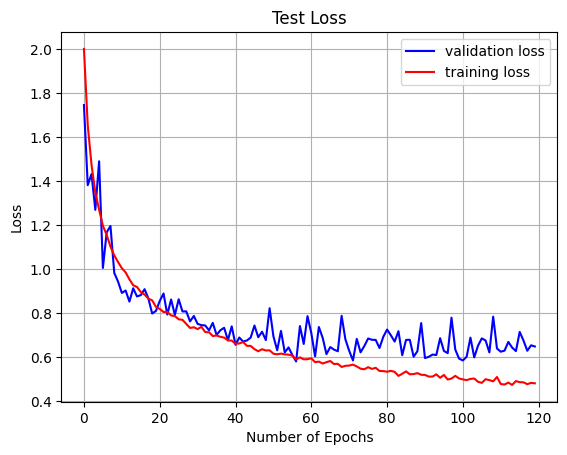

In [10]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="training loss")
plt.grid()
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
test = image_gen_train.flow_from_directory(validation_dir,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    batch_size = BATCH_SIZE,
    shuffle = False)

result = model.evaluate(test)
acc = dict(zip(model.metrics_names, result))['compile_metrics']*100
acc = round(acc)
print("Точность нейросети: ", acc, "%", sep='')

Found 4361 images belonging to 10 classes.
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 371ms/step - accuracy: 0.7963 - loss: 0.6401
Точность нейросети: 81%


44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 373ms/step


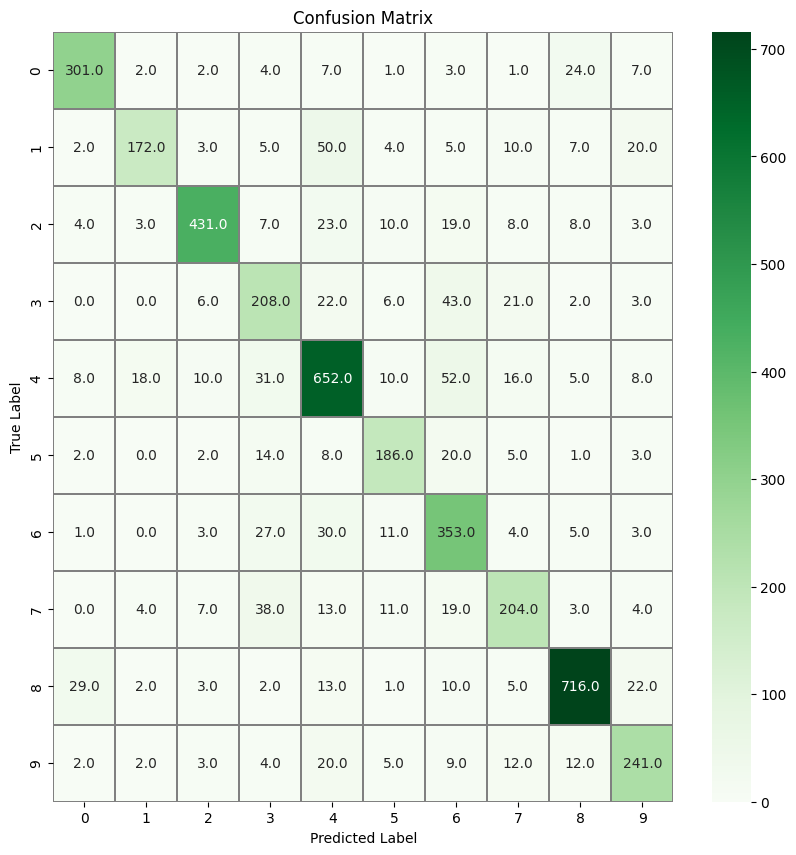

In [12]:
# Predict the values from the validation dataset
Y_pred = model.predict(test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.array(test.labels)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [13]:
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       352
           1       0.85      0.62      0.72       278
           2       0.92      0.84      0.87       516
           3       0.61      0.67      0.64       311
           4       0.78      0.80      0.79       810
           5       0.76      0.77      0.77       241
           6       0.66      0.81      0.73       437
           7       0.71      0.67      0.69       303
           8       0.91      0.89      0.90       803
           9       0.77      0.78      0.77       310

    accuracy                           0.79      4361
   macro avg       0.78      0.77      0.77      4361
weighted avg       0.80      0.79      0.80      4361



In [37]:
myPicture = image_gen_train.flow_from_directory(test_dir,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    batch_size = BATCH_SIZE,
    shuffle = False)

picture_names = myPicture.filenames
result = model.predict(myPicture, verbose=0)

train_ds = image_dataset_from_directory(train_dir)
class_names = dict(zip(train_ds.class_names, range(len(train_ds.class_names))))
class_names = list(class_names.keys())

for i in range(len(result)):
    print(f"Распознанная картинка {picture_names[i]}- это", class_names[np.argmax(result[i])])


Found 5 images belonging to 1 classes.
Found 21818 files belonging to 10 classes.
Распознанная картинка 1\-65h7juu3Jk.jpg- это cow
Распознанная картинка 1\104.jpg- это elephant
Распознанная картинка 1\69-pic_32ratio_1200x800-1200x800-7237.jpg- это dog
Распознанная картинка 1\acanthoscurria_geniculata-1080x720.jpg- это spider
Распознанная картинка 1\images.jpeg- это squirrel


In [38]:
model.save('models/81percent.keras')